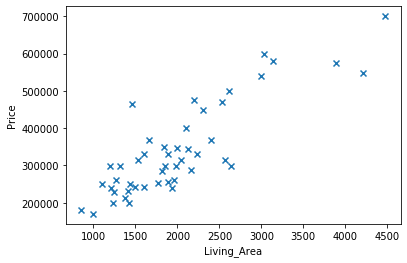

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('house-prices.txt', names=['Living_Area','No_of_Bedrooms','Price'])
plt.scatter(df['Living_Area'], df['Price'], marker = 'x')
plt.xlabel("Living_Area")
plt.ylabel("Price")
plt.show()

In [0]:
df.head()

,Living_Area,No_of_Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#Preprocessing the Data

In [0]:
from sklearn.preprocessing import normalize
data = normalize(df, axis=0)
X = data[:, 0:2]
Y = data[:, 2:]
theta = np.zeros([3,1])

In [0]:
data[0]

array([0.14276982, 0.13429844, 0.16105104])

#Hypothesis Function

In [0]:
def hypothesis(theta, X) :
    x = np.ones([47,3])
    x[:,1:] = X   #Adding x0=1 to X feature vector
    h = np.matmul(x, theta)
    return  h

#Cost Function

In [0]:
def cost_fn (theta, X, Y) :
    t = np.empty([0,0])
    for i in range(47):
        t = np.append(t, [np.square(Y - hypothesis(theta, X))])
    return (1/2)*(np.sum(t))

In [0]:
#cost_fn(theta,X,Y)

#Loss Function

In [0]:
def loss (theta, X, Y):
    return np.average(np.square(Y - hypothesis(theta, X))) / 2

In [0]:
#loss(theta,X,Y)

#Set LEARNING RATE to 0.1 and limit maximum iterations to 1000



In [0]:
alpha = 0.1
iters = 1001

#Derivative Function

In [0]:
def Derivative(theta,X,Y):
    x = np.ones([47,3])
    x[:,1:] = X          #Adding x0=1 to X feature vector
    d_theta = np.empty([0,0])
    d_theta = - np.average((Y - hypothesis_fn(theta, X)) * x, axis= 0)
    d_theta = d_theta.reshape((d_theta.shape[0], 1))  
    return d_theta

#Batch Gradient Descent

In [0]:
def Batch_Gradient_Descent(theta, X, Y, alpha, iters):
    cost = np.zeros(iters)
    
    for i in range(iters):
        theta = theta - (alpha/2)*Derivative(theta, X, Y)
        cost[i] = cost_fn(theta, X, Y)
        
        if i % 50 == 0 :
            print ('iteration : ', i, ' loss : ', cost_fn(theta, X, Y))
    return (theta, cost)

In [0]:
B_theta, B_cost = Batch_Gradient_Descent(theta, X, Y, alpha, iters)
#np.array(B_theta[1])

iteration :  0  loss :  21.387200466768398
iteration :  50  loss :  2.6838302534012244
iteration :  100  loss :  2.5656656962455275
iteration :  150  loss :  2.5376858111474343
iteration :  200  loss :  2.5105719097750328
iteration :  250  loss :  2.4838858488091446
iteration :  300  loss :  2.457618794176805
iteration :  350  loss :  2.431764091680827
iteration :  400  loss :  2.4063152027111725
iteration :  450  loss :  2.3812656926063793
iteration :  500  loss :  2.3566092289537215
iteration :  550  loss :  2.3323395799634867
iteration :  600  loss :  2.3084506128693274
iteration :  650  loss :  2.2849362923540566
iteration :  700  loss :  2.2617906790004603
iteration :  750  loss :  2.2390079277667443
iteration :  800  loss :  2.2165822864862204
iteration :  850  loss :  2.194508094390849
iteration :  900  loss :  2.172779780658246
iteration :  950  loss :  2.151391862981802
iteration :  1000  loss :  2.13033894616353


#Stochastic Gradient Descent

In [0]:
def Stochastic_Gradient_Descent( theta, X, Y, alpha, iters):
    cost = np.zeros(iters)
    for i in range(iters):
        for j in range(X.shape[0]):
            theta = theta - (alpha/2)*Derivative(theta, X, Y)
            
        cost[i] = cost_fn(theta, X, Y)
        if i % 50 == 0 :
            print ('iteration : ', i, ' loss : ', cost_fn(theta, X, Y))
    return (theta, cost)

In [0]:
S_theta, S_cost = Stochastic_Gradient_Descent(theta, X, Y, alpha, iters)

iteration :  0  loss :  2.734307563817582
iteration :  50  loss :  1.6585201370674154
iteration :  100  loss :  1.2102600754163917
iteration :  150  loss :  0.9931192515494847
iteration :  200  loss :  0.8856776842967911
iteration :  250  loss :  0.8306399901882897
iteration :  300  loss :  0.8009207093735957
iteration :  350  loss :  0.7836737911456887
iteration :  400  loss :  0.7727710005682983
iteration :  450  loss :  0.7652586087885924
iteration :  500  loss :  0.7596874377822389
iteration :  550  loss :  0.7553251681458484
iteration :  600  loss :  0.7517842455237906
iteration :  650  loss :  0.7488456388936009
iteration :  700  loss :  0.7463749629286811
iteration :  750  loss :  0.7442822178643909
iteration :  800  loss :  0.7425021769415193
iteration :  850  loss :  0.7409845904909012
iteration :  900  loss :  0.7396890933863831
iteration :  950  loss :  0.7385823966062119
iteration :  1000  loss :  0.7376366137597894


#Normal Equations

In [0]:
 #Calculating θ without using Gradient Descent. 
def normal_equation(theta, X, Y):
    x = np.ones([47,3])
    x[:,1:] = X     # #Adding x0=1 to X feature vector
    x = np.matrix(x)
    Y = np.matrix(Y)
    theta = np.matrix(theta)
    XT = x.T  # transpose of x
    m1 = np.matmul(XT, x)
    m2 = m1.I           #((XT*X).I)
    m3 = np.matmul(XT, Y)
    theta = np.matmul(m2, m3)
    theta1 = np.array(theta)
    X1 = np.array(X)
    Y1 = np.array(Y)
    cost = loss(theta1, X1, Y1)
    print('Calculated Loss :', cost)
    
    return (theta, cost)

In [0]:
N_theta, N_cost = normal_equation(theta, X, Y)
#N_theta[0:2]

Calculated Loss : 0.000331399737350973


#Plotting the results

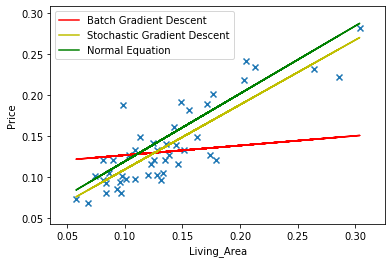

In [0]:
x = X[:,0]
y = data[:,2]

# Batch gradient descent
B_intercept = np.array(B_theta[0])
B_slope = np.array(B_theta[1])
B_y = B_intercept + x*B_slope   # line equation

# Stochastic gradiant descent
S_intercept = np.array(S_theta[0])
S_slope = np.array(S_theta[1])
S_y = S_intercept + x*S_slope   # line equation

# Normal Equation
N_intercept = np.array(N_theta[0][0])[0]
N_slope = np.array(N_theta[1][0])[0]
N_y = N_intercept + x*N_slope   # line equation

plt.scatter(x, y, marker='x')
plt.xlabel("Living_Area")
plt.ylabel("Price")

plt.plot(x, B_y, 'r', label= 'Batch Gradient Descent')
plt.plot(x, S_y, 'y', label= 'Stochastic Gradient Descent')
plt.plot(x, N_y, 'g', label= 'Normal Equation')
plt.legend(loc='upper left')
plt.show()